In [ ]:
!pip install prophet==1.1
!pip install yfinance
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 545 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


[*********************100%***********************]  1 of 1 completed


,ds,Open,High,Low,Close,y,Volume
0,1997-07-02,9094.269531,9124.299805,8988.129883,8996.719727,8996.686523,0
1,1997-07-03,9061.599609,9061.599609,8997.509766,9027.629883,9027.596680,0
2,1997-07-04,9144.959961,9218.209961,9119.250000,9192.570312,9192.536133,0
3,1997-07-07,9365.190430,9370.410156,9304.820312,9322.839844,9322.805664,0
4,1997-07-08,9345.549805,9371.500000,9282.099609,9305.269531,9305.235352,0
...,...,...,...,...,...,...,...
6176,2022-08-29,15197.190430,15197.190430,14843.719727,14926.190430,14926.190430,2973800
6177,2022-08-30,14919.669922,15027.500000,14911.969727,14953.629883,14953.629883,2729600
6178,2022-08-31,14912.120117,15095.440430,14874.330078,15095.440430,15095.440430,3006200
6179,2022-09-01,14981.000000,14981.000000,14773.190430,14801.860352,14801.860352,3009700


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsd829nnq/apkrtk77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsd829nnq/_prnzubp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11161', 'data', 'file=/tmp/tmpsd829nnq/apkrtk77.json', 'init=/tmp/tmpsd829nnq/_prnzubp.json', 'output', 'file=/tmp/tmpgrcz4spz/prophet_model-20220904085302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:53:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:53:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail(30)

,ds
6181,2022-09-03
6182,2022-09-04
6183,2022-09-05
6184,2022-09-06
6185,2022-09-07
6186,2022-09-08
6187,2022-09-09
6188,2022-09-10
6189,2022-09-11
6190,2022-09-12


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6206,2022-09-28,16875.383295,15707.555798,18018.447228
6207,2022-09-29,16879.782849,15847.648021,18068.361344
6208,2022-09-30,16878.785183,15762.702760,17952.215041
6209,2022-10-01,16684.206429,15567.176701,17801.700576
6210,2022-10-02,16679.088632,15568.110200,17789.639157


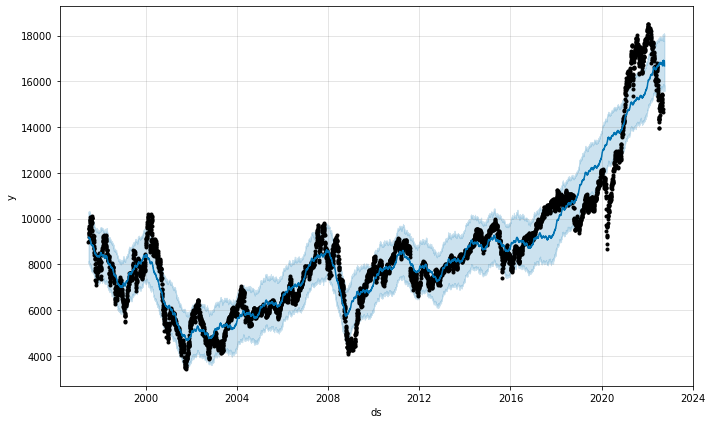

In [ ]:
fig1 = m.plot(forecast)

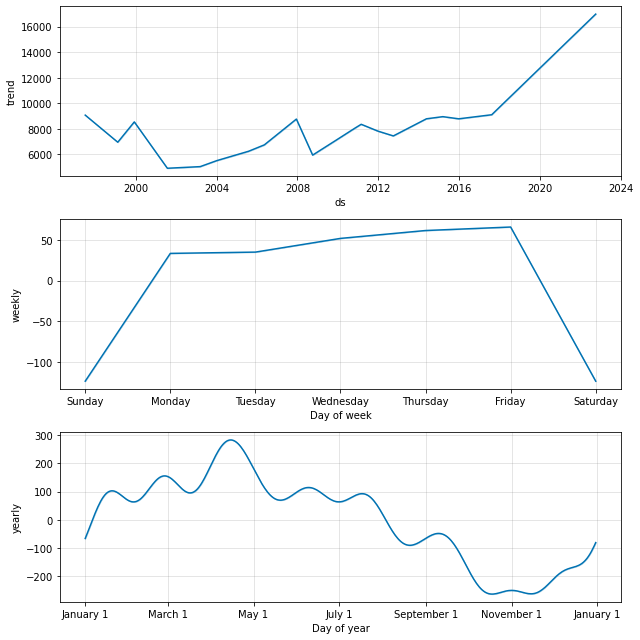

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)